In [1]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

2.2.0
2.3.0-tf


In [2]:
import numpy as np
import pandas as pd

In [3]:
trainData = pd.read_csv("./sign_mnist_train.csv")
testData = pd.read_csv("./sign_mnist_test.csv")

In [4]:
trainData.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [5]:
testData.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [8]:
y_train = trainData['label']
y_test = testData['label']

X_train = trainData.copy()
X_test = testData.copy()

del X_train['label']
del X_test['label']

X_train = X_train.to_numpy().reshape(-1,28,28,1)
X_test = X_test.to_numpy().reshape(-1,28,28,1)

In [7]:
import matplotlib.pyplot as plt
X_train[0].shape

(28, 28, 1)

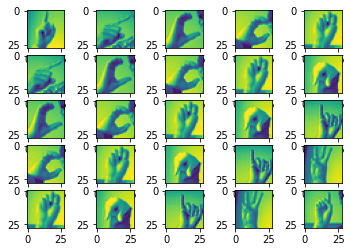

In [9]:
f, ax = plt.subplots(5,5)

for i in range(5):
    for j in range(5):
        ax[i,j].imshow(X_train[i+j].reshape(28,28))

In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [11]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

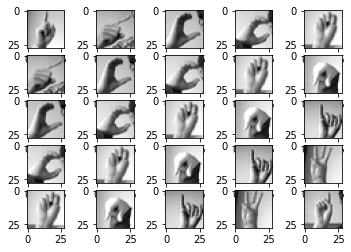

In [12]:
f, ax = plt.subplots(5,5)

for i in range(5):
    for j in range(5):
        ax[i,j].imshow(X_train[i+j].reshape(28,28), cmap="gray")

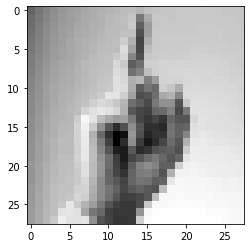

In [13]:
plt.imshow(X_train[0].reshape(28,28), cmap="gray")

In [14]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [15]:
from keras.models import Sequential
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.callbacks import History

In [16]:
testGen = ImageDataGenerator(
    featurewise_center=False, 
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False, 
        rotation_range=10,  
        zoom_range = 0.1,
        width_shift_range=0.1, 
        height_shift_range=0.1,  
        horizontal_flip=False,
        vertical_flip=False
)

testGen.fit(X_train)

In [17]:
history = History()
model = Sequential()
model.add(Conv2D(128, (3,3), padding='same', use_bias=False, input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), padding='same', use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 24 , activation = 'softmax'))

model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 128)       1152      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 128)       512       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        73728     
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 64)       

In [18]:
from keras.callbacks import TensorBoard 
from keras.callbacks import EarlyStopping
import os
import time

    
root_logdir = os.path.join(os.curdir, "my_logs")
run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
path = os.path.join(root_logdir, run_id)

tensorboard_cb = TensorBoard(path)

early_stopping = EarlyStopping(monitor='val_loss', patience=15, mode='min', verbose=1)

In [19]:
history = model.fit(testGen.flow(X_train,y_train) ,epochs = 1000 , validation_data = (X_test, y_test),callbacks=[tensorboard_cb,early_stopping])

Epoch 1/1000
858/858 [==============================] - 110s 129ms/step - loss: 1.3841 - accuracy: 0.5717 - val_loss: 0.5260 - val_accuracy: 0.8388
Epoch 2/1000
858/858 [==============================] - 104s 122ms/step - loss: 0.4270 - accuracy: 0.8545 - val_loss: 0.1623 - val_accuracy: 0.9453
Epoch 3/1000
858/858 [==============================] - 106s 123ms/step - loss: 0.2837 - accuracy: 0.9034 - val_loss: 0.4145 - val_accuracy: 0.8635
Epoch 4/1000
858/858 [==============================] - 103s 120ms/step - loss: 0.2150 - accuracy: 0.9269 - val_loss: 0.0647 - val_accuracy: 0.9819
Epoch 5/1000
858/858 [==============================] - 99s 116ms/step - loss: 0.1783 - accuracy: 0.9401 - val_loss: 0.3197 - val_accuracy: 0.9053
Epoch 6/1000
858/858 [==============================] - 100s 116ms/step - loss: 0.1450 - accuracy: 0.9504 - val_loss: 0.2343 - val_accuracy: 0.9360
Epoch 7/1000
858/858 [==============================] - 99s 116ms/step - loss: 0.1281 - accuracy: 0.9568 - val_lo

858/858 [==============================] - 99s 116ms/step - loss: 0.0155 - accuracy: 0.9948 - val_loss: 0.0202 - val_accuracy: 0.9957
Epoch 57/1000
858/858 [==============================] - 101s 118ms/step - loss: 0.0130 - accuracy: 0.9956 - val_loss: 0.0075 - val_accuracy: 0.9965
Epoch 58/1000
858/858 [==============================] - 100s 116ms/step - loss: 0.0145 - accuracy: 0.9954 - val_loss: 0.0626 - val_accuracy: 0.9851
Epoch 59/1000
858/858 [==============================] - 101s 118ms/step - loss: 0.0145 - accuracy: 0.9952 - val_loss: 0.0195 - val_accuracy: 0.9943
Epoch 60/1000
858/858 [==============================] - 100s 117ms/step - loss: 0.0163 - accuracy: 0.9948 - val_loss: 0.0183 - val_accuracy: 0.9951
Epoch 61/1000
858/858 [==============================] - 101s 117ms/step - loss: 0.0154 - accuracy: 0.9956 - val_loss: 0.4645 - val_accuracy: 0.9156
Epoch 62/1000
858/858 [==============================] - 101s 118ms/step - loss: 0.0145 - accuracy: 0.9954 - val_loss: 0.

In [20]:
model.save('./CNN_Model1') 

In [22]:
MODEL_OUTPUT = os.path.join(".")
model_name = "CNN_Model1"

plot_model( model, to_file=os.path.join(MODEL_OUTPUT, "{}-graph.png".format(model_name)), show_shapes=True )

plot_history( history.history, path=os.path.join(MODEL_OUTPUT, "{}-history.png".format(model_name)))
plt.close()

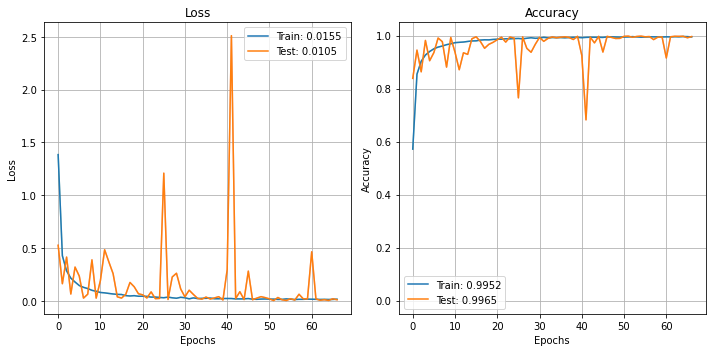

In [23]:
plot_history( history.history, path=os.path.join(MODEL_OUTPUT, "{}-history.png".format(model_name)))


In [24]:
history2 = History()
model2 = Sequential()
model2.add(Conv2D(128, (3,3), padding='same', use_bias=False, input_shape = X_train[0].shape))
model2.add(BatchNormalization())
model2.add(Activation("relu"))

model2.add(MaxPool2D((2,2)))
model2.add(Dropout(0.4))

model2.add(Conv2D(64, (3,3), padding='same', use_bias=False))
model2.add(BatchNormalization())
model2.add(Activation("relu"))

model2.add(MaxPool2D((2,2)))
model2.add(Dropout(0.4))

model2.add(Conv2D(32, (3,3), padding='same', use_bias=False))
model2.add(BatchNormalization())
model2.add(Activation("relu"))

model2.add(MaxPool2D((2,2)))
model2.add(Dropout(0.4))

model2.add(Flatten())

model2.add(Dense(units = 512 , activation = 'relu'))
model2.add(Dropout(0.2))

model2.add(Dense(units = 24 , activation = 'softmax'))

model2.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model2.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 128)       1152      
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 28, 128)       512       
_________________________________________________________________
activation_3 (Activation)    (None, 28, 28, 128)       0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        73728     
_________________________________________________________________
batch_normalization_4 (Batch (None, 14, 14, 64)       

In [25]:

root_logdir = os.path.join(os.curdir, "my_logs")
run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
path = os.path.join(root_logdir, run_id)

tensorboard_cb2 = TensorBoard(path)

early_stopping2 = EarlyStopping(monitor='val_loss', patience=15, mode='min', verbose=1)

In [26]:
history2 = model2.fit(testGen.flow(X_train,y_train) ,epochs = 1000 , validation_data = (X_test, y_test),callbacks=[tensorboard_cb2,early_stopping2])

Epoch 1/1000
  3/858 [..............................] - ETA: 14:26 - loss: 3.9342 - accuracy: 0.0208 

C:\Users\TNMB67\Anaconda3\envs\tf\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (1.109093). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


858/858 [==============================] - 94s 109ms/step - loss: 1.7286 - accuracy: 0.4510 - val_loss: 2.1171 - val_accuracy: 0.3986
Epoch 2/1000
858/858 [==============================] - 91s 106ms/step - loss: 0.6851 - accuracy: 0.7622 - val_loss: 0.4372 - val_accuracy: 0.8431
Epoch 3/1000
858/858 [==============================] - 91s 106ms/step - loss: 0.4612 - accuracy: 0.8382 - val_loss: 0.3717 - val_accuracy: 0.8744
Epoch 4/1000
858/858 [==============================] - 91s 106ms/step - loss: 0.3563 - accuracy: 0.8761 - val_loss: 0.1261 - val_accuracy: 0.9738
Epoch 5/1000
858/858 [==============================] - 91s 106ms/step - loss: 0.2904 - accuracy: 0.8987 - val_loss: 0.3687 - val_accuracy: 0.8618
Epoch 6/1000
858/858 [==============================] - 92s 107ms/step - loss: 0.2550 - accuracy: 0.9128 - val_loss: 0.3590 - val_accuracy: 0.8694
Epoch 7/1000
858/858 [==============================] - 91s 106ms/step - loss: 0.2166 - accuracy: 0.9237 - val_loss: 0.1188 - val_a

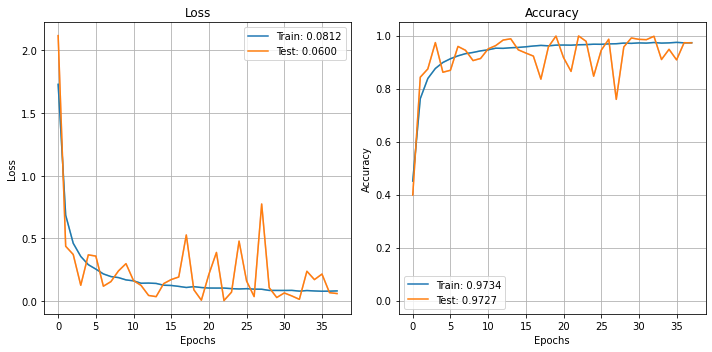

In [27]:
plot_history( history2.history, path=os.path.join(MODEL_OUTPUT, "{}-history.png".format(model_name)))


In [46]:
history = History()
model = Sequential()
model.add(Conv2D(100, (3,3), padding='same', use_bias=False, input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(75, (3,3), padding='same', use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(50, (3,3), padding='same', use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))
model.add(Dropout(0.2))


model.add(Flatten())

model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 24 , activation = 'softmax'))

model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 100)       900       
_________________________________________________________________
batch_normalization_4 (Batch (None, 28, 28, 100)       400       
_________________________________________________________________
activation_4 (Activation)    (None, 28, 28, 100)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 100)       0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 100)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 75)        67500     
_________________________________________________________________
batch_normalization_5 (Batch (None, 14, 14, 75)       

In [50]:
history = model.fit(testGen.flow(X_train,y_train) ,epochs = 1000 , validation_data = (X_test, y_test),callbacks=[tensorboard_cb,early_stopping])

Epoch 1/1000
  4/858 [..............................] - ETA: 3:27 - loss: 0.2974 - accuracy: 0.9375

C:\Users\TNMB67\Anaconda3\envs\tf\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.309285). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


858/858 [==============================] - 73s 85ms/step - loss: 0.1268 - accuracy: 0.9636 - val_loss: 0.0156 - val_accuracy: 0.9947
Epoch 2/1000
858/858 [==============================] - 74s 86ms/step - loss: 0.0561 - accuracy: 0.9813 - val_loss: 0.0105 - val_accuracy: 0.9957
Epoch 3/1000
858/858 [==============================] - 74s 87ms/step - loss: 0.0457 - accuracy: 0.9859 - val_loss: 0.0057 - val_accuracy: 0.9992
Epoch 4/1000
858/858 [==============================] - 75s 88ms/step - loss: 0.0408 - accuracy: 0.9868 - val_loss: 0.0637 - val_accuracy: 0.9727
Epoch 5/1000
858/858 [==============================] - 73s 85ms/step - loss: 0.0322 - accuracy: 0.9892 - val_loss: 0.3051 - val_accuracy: 0.9162
Epoch 6/1000
858/858 [==============================] - 74s 86ms/step - loss: 0.0308 - accuracy: 0.9905 - val_loss: 0.0266 - val_accuracy: 0.9884
Epoch 7/1000
858/858 [==============================] - 75s 88ms/step - loss: 0.0303 - accuracy: 0.9911 - val_loss: 0.0271 - val_accuracy

In [51]:
model.save('./CNN_Model') 

In [21]:
from keras.utils.vis_utils import plot_model
from plot_keras_history import plot_history
import matplotlib.pyplot as plt

In [53]:
MODEL_OUTPUT = os.path.join(".")
model_name = "CNN_Model"

plot_model( model, to_file=os.path.join(MODEL_OUTPUT, "{}-graph.png".format(model_name)), show_shapes=True )

plot_history( history.history, path=os.path.join(MODEL_OUTPUT, "{}-history.png".format(model_name)))
plt.close()

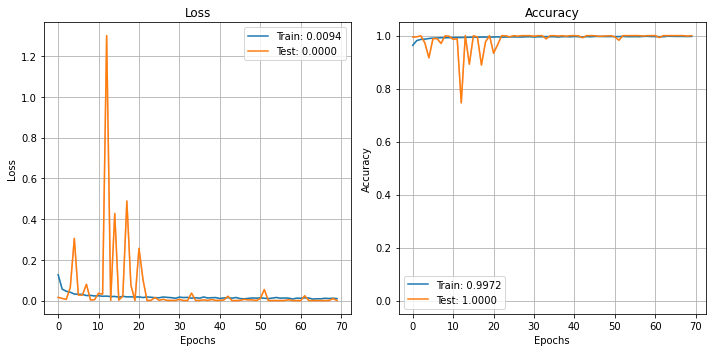

In [54]:
plot_history( history.history, path=os.path.join(MODEL_OUTPUT, "{}-history.png".format(model_name)))
